<a href="https://colab.research.google.com/github/nickLin1225/AI_tibame/blob/main/%E6%A2%AF%E5%BA%A6%E4%B8%8B%E9%99%8D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# inputs
import math
import matplotlib.pyplot as plt
import os
import numpy as np

if not os.path.exists("plot"):
    os.makedirs("plot")

xs = [0.25, 0.5]
# 隨機係數
ws = [3, 2]
ans = 0.4

def loss(x, y):
    v = xs[0] * x + xs[1] * y
    # 如果你不用sigmoid就把它註解掉
    v = 1 / (1 + np.exp(-1 * v))
    loss = (v - ans) ** 2
    return loss

def plot(fn):
    # x可能
    x = np.arange(-3, 3, 0.01)
    # y可能
    y = np.arange(-3, 3, 0.01)
    # 把所有x, y可能性組合在一起
    x, y = np.meshgrid(x, y)
    # 把每個x, y組合帶進去算z
    z = loss(x, y)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # Plot the surface
    ax.plot_wireframe(x, y, z, color='royalblue',alpha=0.2)

    # 劃出目前loss那個點
    px, py = ws[0], ws[1]
    z = loss(px, py)
    ax.scatter([px], [py], [z], marker='o', label='My Points 1', color="r")

    ax.set_xlabel("w1")
    ax.set_ylabel("w2")
    ax.set_zlabel("loss")
    # 如果你不用sigmoid
    # t = "w1={} w2={} y={}\nw1x1+w2x2={}".format(ws[0], ws[1], ans, ws[0]*xs[0]+ws[1]*xs[1])
    v = ws[0]*xs[0]+ws[1]*xs[1]
    v = 1 / (1 + np.exp(-1 * v))
    t = "w1={} w2={} y={}\nw1x1+w2x2={}".format(ws[0], ws[1], ans, v)
    # 直接把圖存檔
    plt.title(t)
    plt.savefig(fn)
    plt.close()
    # plt.show()

# plot("plot/1.png")
for i in range(200):
    noww1, noww2 = ws
    # 原本直
    nowloss = loss(noww1, noww2)
    # w1, w2變動
    step = 0.1
    # w1變動以後新的loss直
    new = loss(noww1+step, noww2)
    # 求w1負斜率
    m = -1 * (new - nowloss) / step
    # 斜率 * 調整常數(變動快一點你才能看到*10)
    addw1 = m * 10
    # w2變動以後新的loss直
    new = loss(noww1, noww2+step)
    # 求w2負斜率
    m = -1 * (new - nowloss) / step
    addw2 = m * 10
    ws = [noww1+addw1, noww2+addw2]
    plot("plot/{}.png".format(i))

In [2]:
# 存成gif檔
import imageio
import glob
fn = glob.glob("plot/*.png")
fn.sort(key=lambda x:int(x.split("/")[-1].split(".")[0]))
with imageio.get_writer('mygif.gif', mode='I') as writer:
    for filename in fn:
        image = imageio.imread(filename)
        writer.append_data(image)

<ipython-input-2-c0c5f36ef5c4>:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


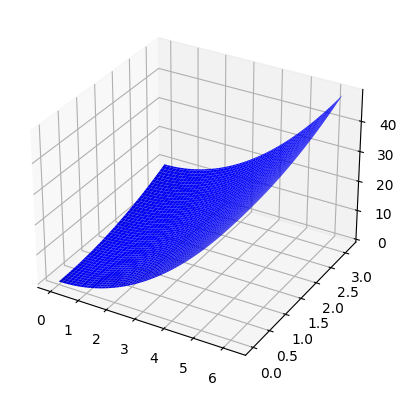

In [3]:
# 我在試3d圖
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make data
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x, y = np.meshgrid(u, v)
z = x ** 2 + y ** 2

# Plot the surface
ax.plot_surface(x, y, z, color='b')

plt.show()

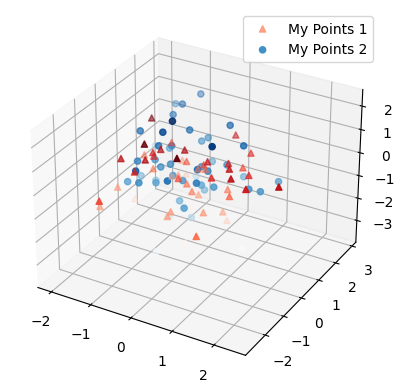

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 建立 3D 圖形
fig = plt.figure()
ax = fig.add_subplot(projection='3d')


# 產生 3D 座標資料
z1 = np.random.randn(50)
x1 = np.random.randn(50)
y1 = np.random.randn(50)
z2 = np.random.randn(50)
x2 = np.random.randn(50)
y2 = np.random.randn(50)

# 繪製 3D 座標點
ax.scatter(x1, y1, z1, c=z1, cmap='Reds', marker='^', label='My Points 1')
ax.scatter(x2, y2, z2, c=z2, cmap='Blues', marker='o', label='My Points 2')

# 顯示圖例
ax.legend()

# 顯示圖形
plt.show()